In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_4mu = [
    
    "4Mu_800GeV_0p25GeV_0p0025mm",
    "4Mu_800GeV_0p25GeV_0p025mm",
    "4Mu_800GeV_0p25GeV_0p25mm",
    "4Mu_800GeV_0p25GeV_1p2mm",
    "4Mu_800GeV_0p25GeV_2p5mm",   
    
    "4Mu_800GeV_1p2GeV_0p012mm",
    "4Mu_800GeV_1p2GeV_0p12mm",
    "4Mu_800GeV_1p2GeV_1p2mm",
    "4Mu_800GeV_1p2GeV_6p0mm",
    "4Mu_800GeV_1p2GeV_12p0mm",
    
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_800GeV_5p0GeV_0p5mm",
    "4Mu_800GeV_5p0GeV_5p0mm",
    "4Mu_800GeV_5p0GeV_25p0mm",
    "4Mu_800GeV_5p0GeV_50p0mm",
    
]

samples_bkg = [
    "TTJets",
]

In [3]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=10, location_cfg="signal_v6.yaml")
fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", max_files=10, location_cfg="backgrounds.yaml")

fileset_4mu['TTJets'] = fileset_bkg['TTJets']

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
)

output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)

out_4mu = output_4mu["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [5]:
samples_100_025 = [
    "TTJets",
    
    "4Mu_800GeV_0p25GeV_0p0025mm",
    "4Mu_800GeV_0p25GeV_0p025mm",
    "4Mu_800GeV_0p25GeV_0p25mm",
    "4Mu_800GeV_0p25GeV_1p2mm",
    "4Mu_800GeV_0p25GeV_2p5mm",     
]

samples_100_125 = [
    "TTJets",
    
    "4Mu_800GeV_1p2GeV_0p012mm",
    "4Mu_800GeV_1p2GeV_0p12mm",
    "4Mu_800GeV_1p2GeV_1p2mm",
    "4Mu_800GeV_1p2GeV_6p0mm",
    "4Mu_800GeV_1p2GeV_12p0mm",
]

samples_100_5 = [
    "TTJets",
    
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_800GeV_5p0GeV_0p5mm",
    "4Mu_800GeV_5p0GeV_5p0mm",
    "4Mu_800GeV_5p0GeV_25p0mm",
    "4Mu_800GeV_5p0GeV_50p0mm",
]

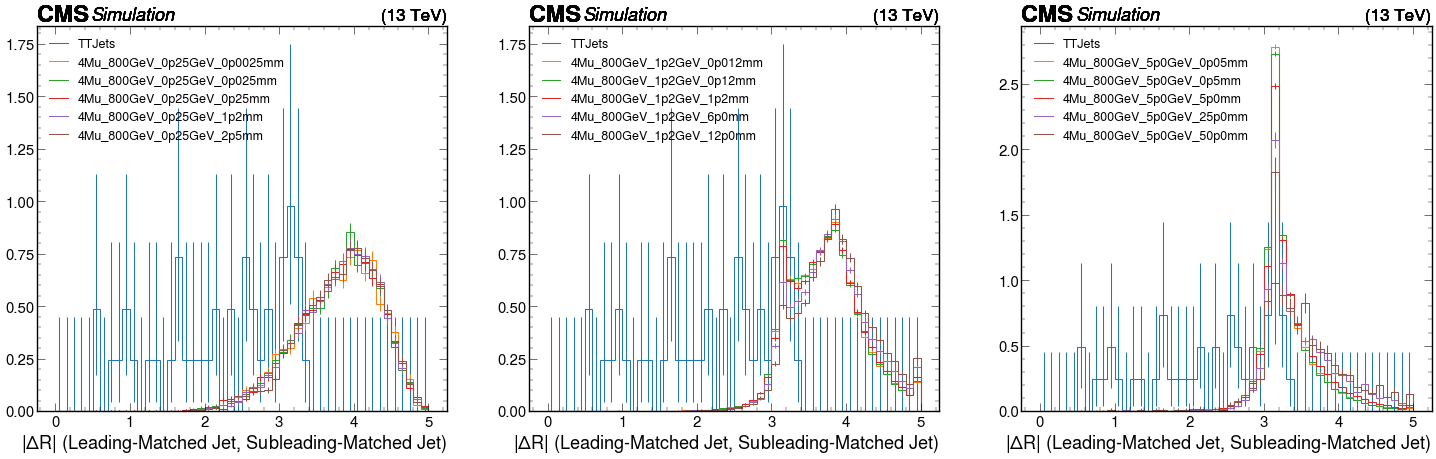

In [6]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=2, prop={'size': 18})

plt.subplot(1,3,2)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=2, prop={'size': 18})

plt.subplot(1,3,3)
for sample in samples_100_5:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_100_5, loc=2, prop={'size': 18})

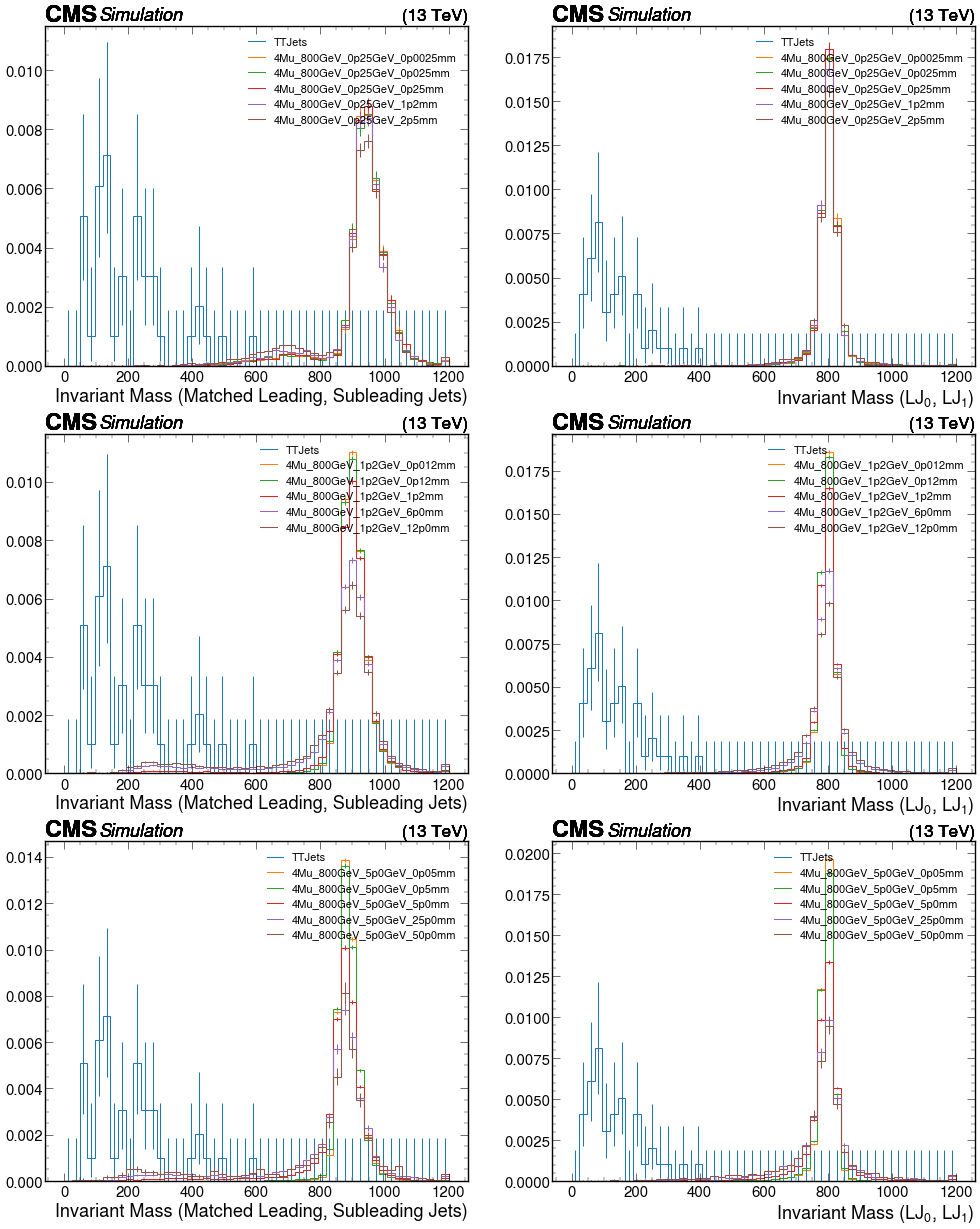

In [8]:
plt.subplots(3,2,figsize=(24,30))

plt.subplot(3,2,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(3,2,2)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(3,2,3)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

plt.subplot(3,2,4)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

plt.subplot(3,2,5)
for sample in samples_100_5:
    utilities.plot(out_4mu[sample]["hists"]["matchedjet_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_100_5, loc=1, prop={'size': 16})

plt.subplot(3,2,6)
for sample in samples_100_5:
    utilities.plot(out_4mu[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_100_5, loc=1, prop={'size': 16})

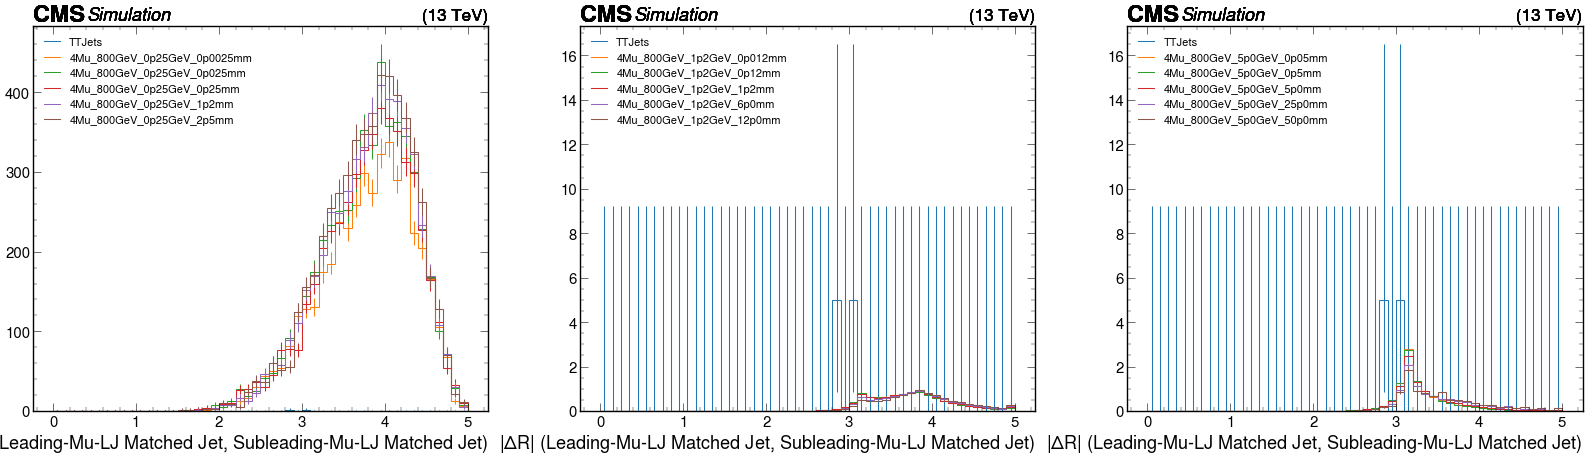

In [9]:
plt.subplots(1,3,figsize=(40,10))

plt.subplot(1,3,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["mu_matchedjet_mu_matchedjet_absdR"][channels[0], :], density=False)
plt.legend(samples_100_025, loc=2, prop={'size': 16})

plt.subplot(1,3,2)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["mu_matchedjet_mu_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=2, prop={'size': 16})

plt.subplot(1,3,3)
for sample in samples_100_5:
    utilities.plot(out_4mu[sample]["hists"]["mu_matchedjet_mu_matchedjet_absdR"][channels[0], :], density=True)
plt.legend(samples_100_5, loc=2, prop={'size': 16})

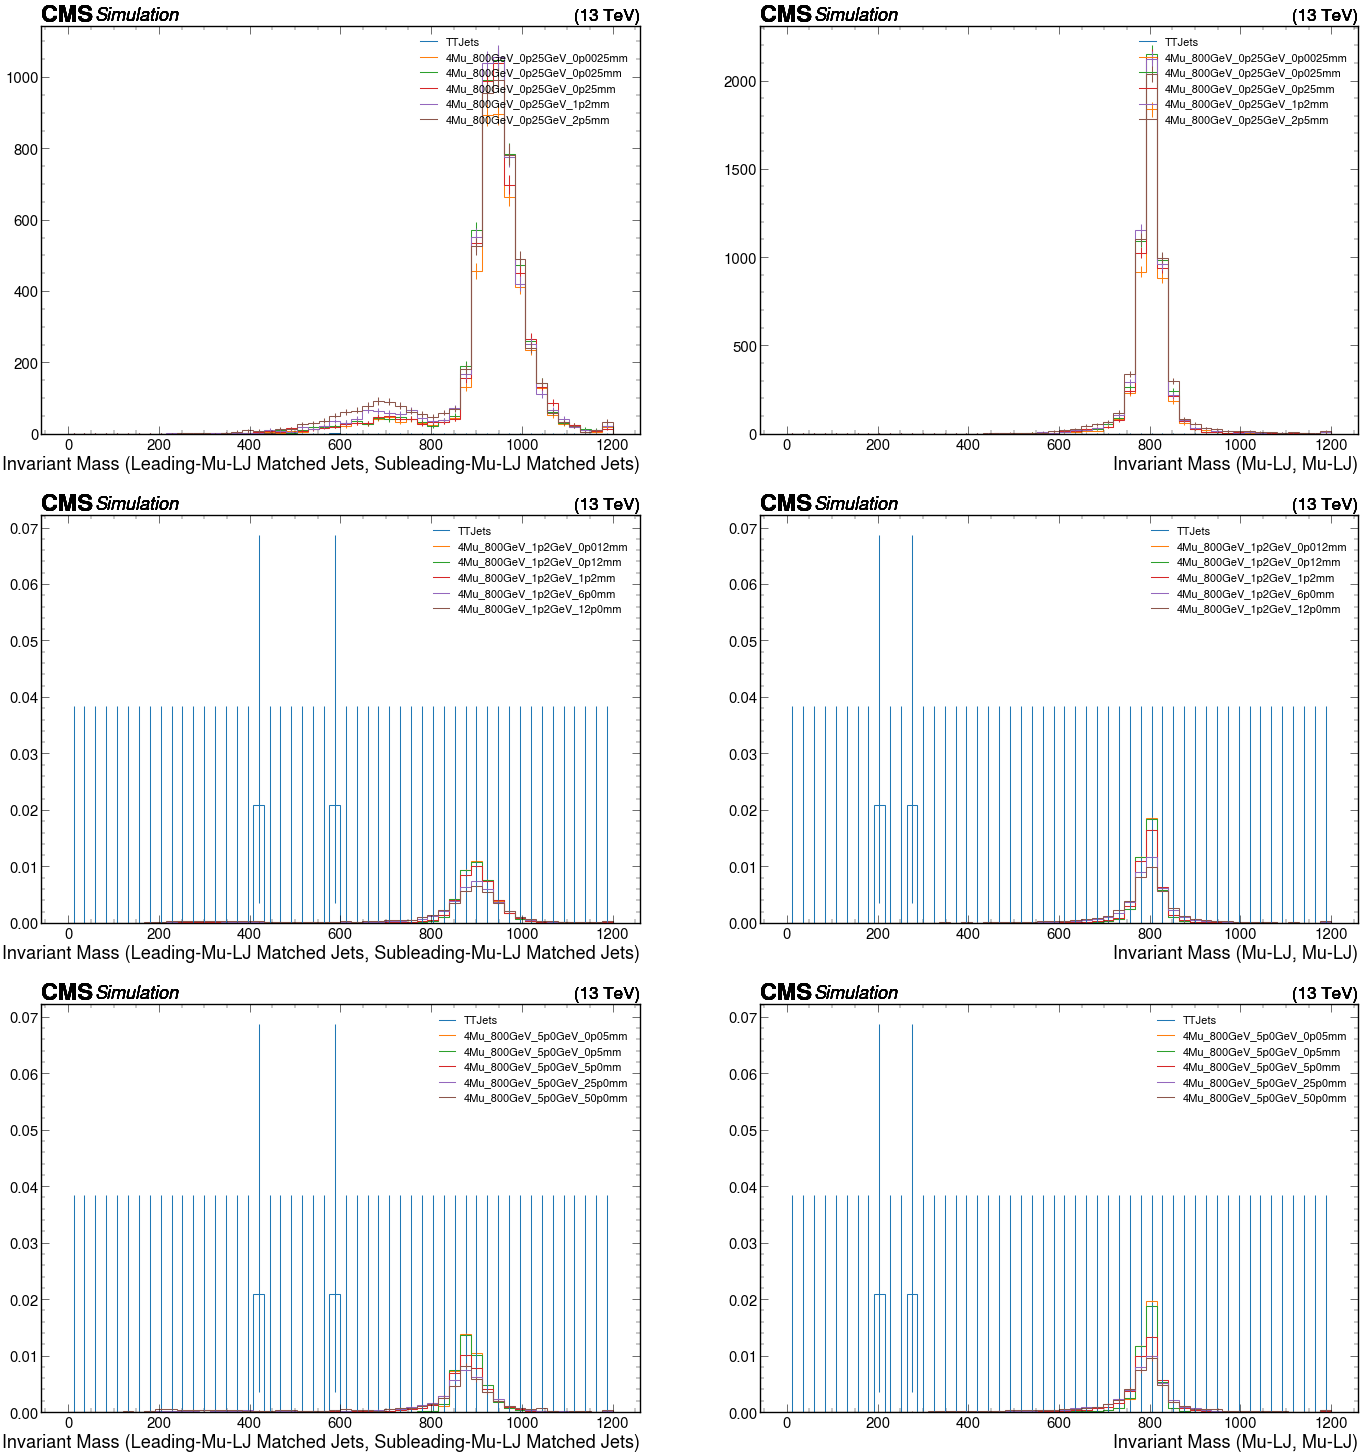

In [11]:
plt.subplots(3,2,figsize=(34,36))

plt.subplot(3,2,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["mu_matchedjet_mu_matchedjet_invmass"][channels[0], :], density=False)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(3,2,2)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["mu_lj_mu_lj_invmass"][channels[0], :], density=False)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(3,2,3)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["mu_matchedjet_mu_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

plt.subplot(3,2,4)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["mu_lj_mu_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

plt.subplot(3,2,5)
for sample in samples_100_5:
    utilities.plot(out_4mu[sample]["hists"]["mu_matchedjet_mu_matchedjet_invmass"][channels[0], :], density=True)
plt.legend(samples_100_5, loc=1, prop={'size': 16})

plt.subplot(3,2,6)
for sample in samples_100_5:
    utilities.plot(out_4mu[sample]["hists"]["mu_lj_mu_lj_invmass"][channels[0], :], density=True)
plt.legend(samples_100_5, loc=1, prop={'size': 16})

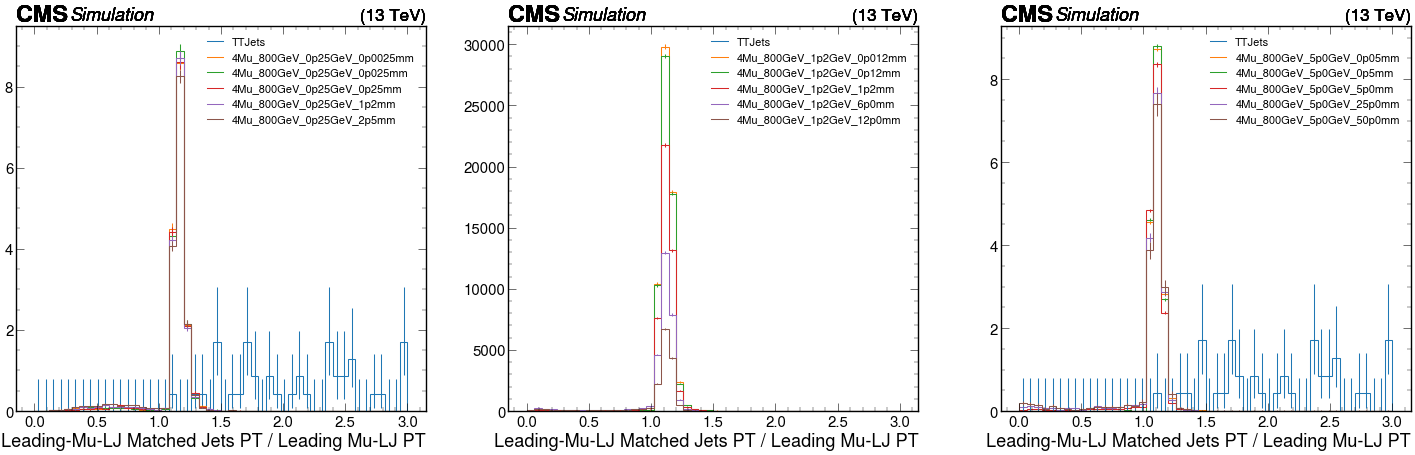

In [12]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(1,3,2)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lj_ptRatio"][channels[0], :], density=False)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

plt.subplot(1,3,3)
for sample in samples_100_5:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lj_ptRatio"][channels[0], :], density=True)
plt.legend(samples_100_5, loc=1, prop={'size': 16})

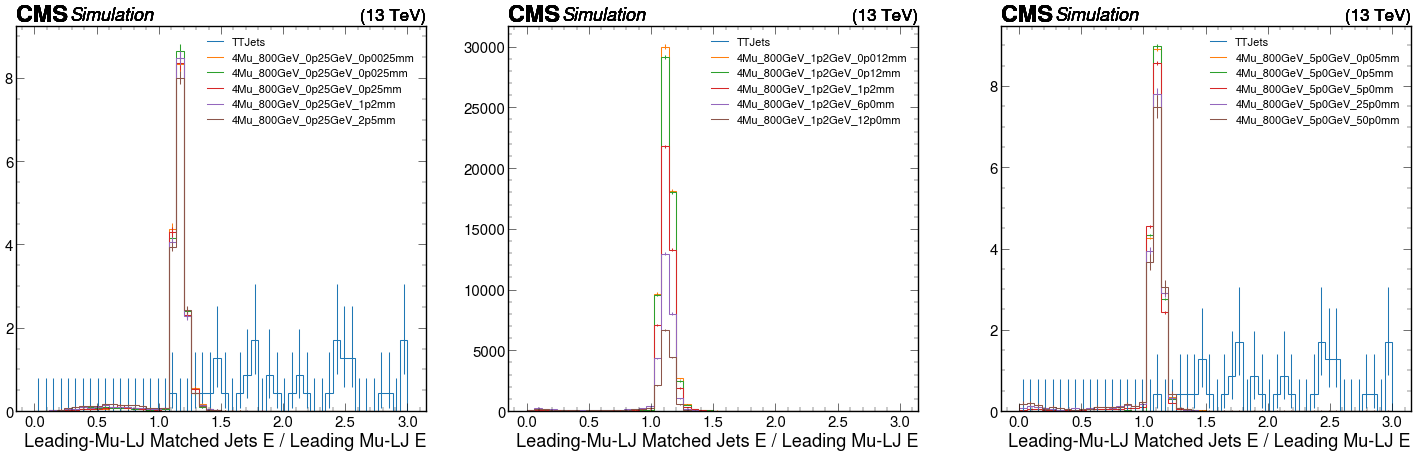

In [13]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(1,3,2)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lj_ERatio"][channels[0], :], density=False)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

plt.subplot(1,3,3)
for sample in samples_100_5:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lj_ERatio"][channels[0], :], density=True)
plt.legend(samples_100_5, loc=1, prop={'size': 16})

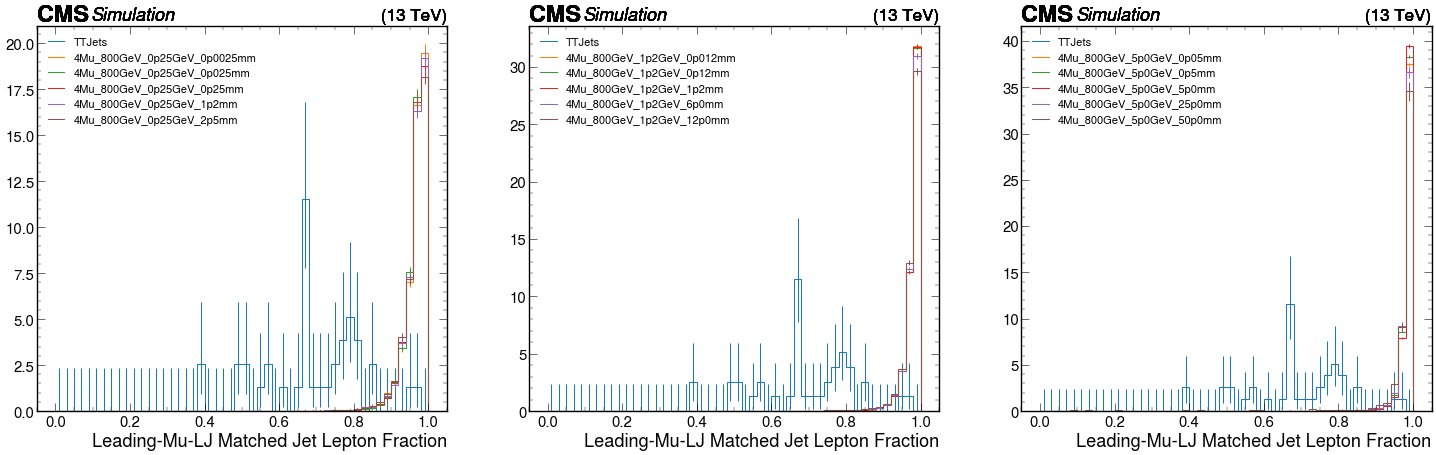

In [14]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=2, prop={'size': 16})

plt.subplot(1,3,2)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=2, prop={'size': 16})

plt.subplot(1,3,3)
for sample in samples_100_5:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_100_5, loc=2, prop={'size': 16})

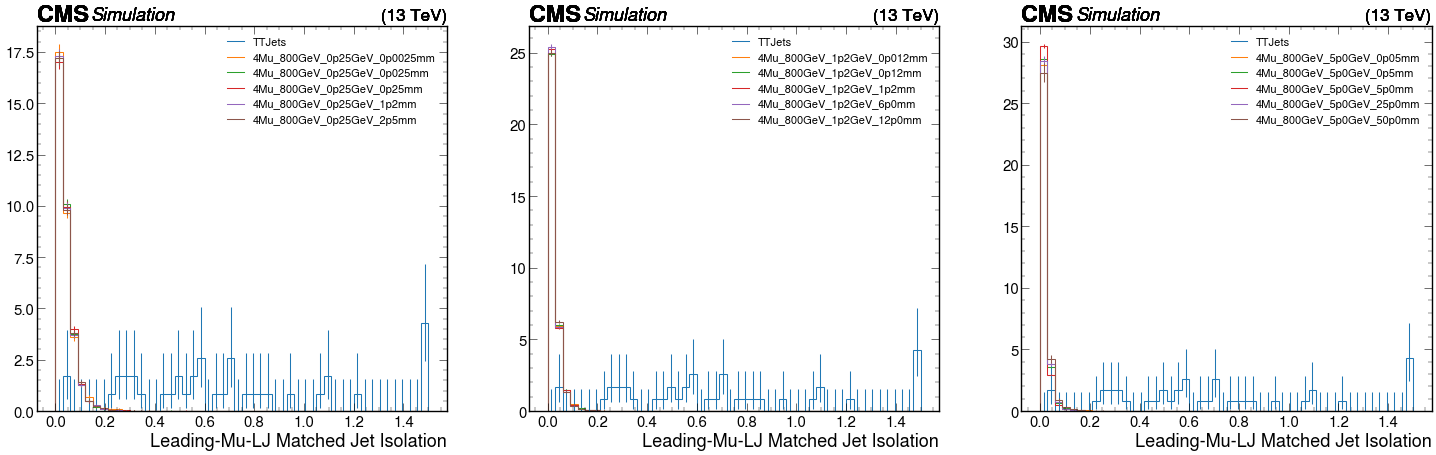

In [15]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_isolation"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(1,3,2)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_isolation"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

plt.subplot(1,3,3)
for sample in samples_100_5:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_isolation"][channels[0], :], density=True)
plt.legend(samples_100_5, loc=1, prop={'size': 16})

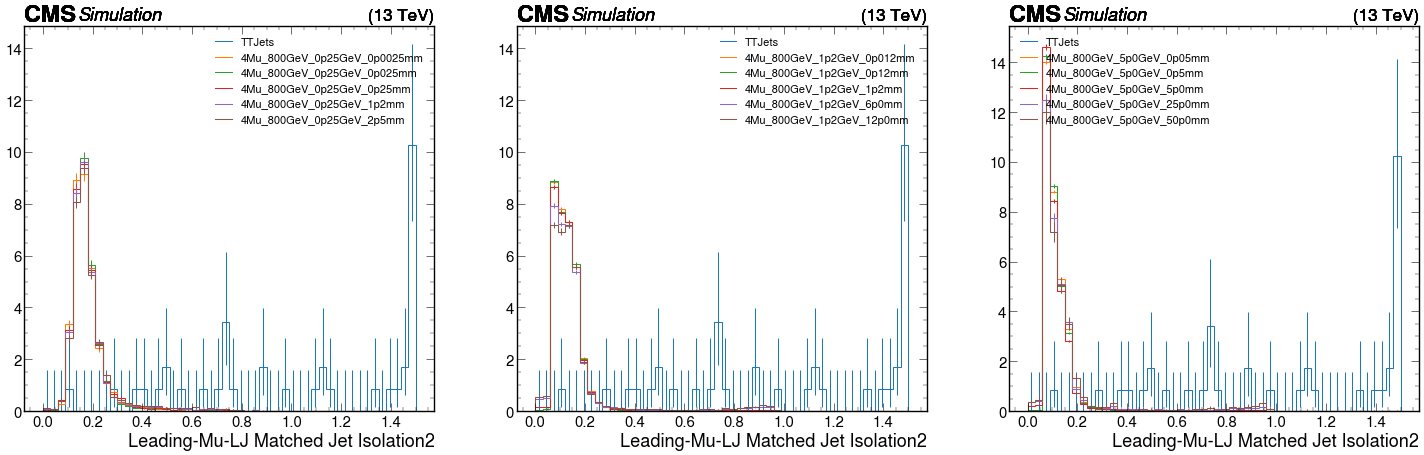

In [16]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_100_025:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_isolation2"][channels[0], :], density=True)
plt.legend(samples_100_025, loc=1, prop={'size': 16})

plt.subplot(1,3,2)
for sample in samples_100_125:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_isolation2"][channels[0], :], density=True)
plt.legend(samples_100_125, loc=1, prop={'size': 16})

plt.subplot(1,3,3)
for sample in samples_100_5:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_isolation2"][channels[0], :], density=True)
plt.legend(samples_100_5, loc=2, prop={'size': 16})

In [17]:
for sample in samples_100_025:
    print(sample, "Total LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total LJs'])
    print(sample, "Total Mu-LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total Mu-LJs'])
    print(sample, "Total EGM-LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total EGM-LJs'])
    print("")
    print(sample, "Total Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Matched-Jets'])
    print(sample, "Total Leading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Leading-Mu-Matched-Jets'])
    print(sample, "Total Subleading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Subleading-Mu-Matched-Jets'])
    print(sample, "Total EGM-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total EGM-Matched-Jets'])
    print("##############################")
    print("")

TTJets Total LJs 83
TTJets Total Mu-LJs 41
TTJets Total EGM-LJs 42

TTJets Total Matched-Jets 82
TTJets Total Leading-Mu-Matched-Jets 39
TTJets Total Subleading-Mu-Matched-Jets 2
TTJets Total EGM-Matched-Jets 39
##############################

4Mu_800GeV_0p25GeV_0p0025mm Total LJs 8810
4Mu_800GeV_0p25GeV_0p0025mm Total Mu-LJs 8792
4Mu_800GeV_0p25GeV_0p0025mm Total EGM-LJs 18

4Mu_800GeV_0p25GeV_0p0025mm Total Matched-Jets 8791
4Mu_800GeV_0p25GeV_0p0025mm Total Leading-Mu-Matched-Jets 4395
4Mu_800GeV_0p25GeV_0p0025mm Total Subleading-Mu-Matched-Jets 4394
4Mu_800GeV_0p25GeV_0p0025mm Total EGM-Matched-Jets 18
##############################

4Mu_800GeV_0p25GeV_0p025mm Total LJs 10292
4Mu_800GeV_0p25GeV_0p025mm Total Mu-LJs 10271
4Mu_800GeV_0p25GeV_0p025mm Total EGM-LJs 21

4Mu_800GeV_0p25GeV_0p025mm Total Matched-Jets 10276
4Mu_800GeV_0p25GeV_0p025mm Total Leading-Mu-Matched-Jets 5138
4Mu_800GeV_0p25GeV_0p025mm Total Subleading-Mu-Matched-Jets 5131
4Mu_800GeV_0p25GeV_0p025mm Total EGM-Matc

In [18]:
for sample in samples_100_125:
    print(sample, "Total LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total LJs'])
    print(sample, "Total Mu-LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total Mu-LJs'])
    print(sample, "Total EGM-LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total EGM-LJs'])
    print("")
    print(sample, "Total Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Matched-Jets'])
    print(sample, "Total Leading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Leading-Mu-Matched-Jets'])
    print(sample, "Total Subleading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Subleading-Mu-Matched-Jets'])
    print(sample, "Total EGM-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total EGM-Matched-Jets'])
    print("##############################")
    print("")

TTJets Total LJs 83
TTJets Total Mu-LJs 41
TTJets Total EGM-LJs 42

TTJets Total Matched-Jets 82
TTJets Total Leading-Mu-Matched-Jets 39
TTJets Total Subleading-Mu-Matched-Jets 2
TTJets Total EGM-Matched-Jets 39
##############################

4Mu_800GeV_1p2GeV_0p012mm Total LJs 124030
4Mu_800GeV_1p2GeV_0p012mm Total Mu-LJs 123960
4Mu_800GeV_1p2GeV_0p012mm Total EGM-LJs 70

4Mu_800GeV_1p2GeV_0p012mm Total Matched-Jets 123965
4Mu_800GeV_1p2GeV_0p012mm Total Leading-Mu-Matched-Jets 61982
4Mu_800GeV_1p2GeV_0p012mm Total Subleading-Mu-Matched-Jets 61970
4Mu_800GeV_1p2GeV_0p012mm Total EGM-Matched-Jets 70
##############################

4Mu_800GeV_1p2GeV_0p12mm Total LJs 121589
4Mu_800GeV_1p2GeV_0p12mm Total Mu-LJs 121494
4Mu_800GeV_1p2GeV_0p12mm Total EGM-LJs 95

4Mu_800GeV_1p2GeV_0p12mm Total Matched-Jets 121504
4Mu_800GeV_1p2GeV_0p12mm Total Leading-Mu-Matched-Jets 60750
4Mu_800GeV_1p2GeV_0p12mm Total Subleading-Mu-Matched-Jets 60739
4Mu_800GeV_1p2GeV_0p12mm Total EGM-Matched-Jets 95
###

In [19]:
for sample in samples_100_5:
    print(sample, "Total LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total LJs'])
    print(sample, "Total Mu-LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total Mu-LJs'])
    print(sample, "Total EGM-LJs", out_4mu[sample]["counters"]["0.4"]['base']['Total EGM-LJs'])
    print("")
    print(sample, "Total Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Matched-Jets'])
    print(sample, "Total Leading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Leading-Mu-Matched-Jets'])
    print(sample, "Total Subleading-Mu-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total Subleading-Mu-Matched-Jets'])
    print(sample, "Total EGM-Matched-Jets", out_4mu[sample]["counters"]["0.4"]['base']['Total EGM-Matched-Jets'])
    print("##############################")
    print("")

TTJets Total LJs 83
TTJets Total Mu-LJs 41
TTJets Total EGM-LJs 42

TTJets Total Matched-Jets 82
TTJets Total Leading-Mu-Matched-Jets 39
TTJets Total Subleading-Mu-Matched-Jets 2
TTJets Total EGM-Matched-Jets 39
##############################

4Mu_800GeV_5p0GeV_0p05mm Total LJs 148510
4Mu_800GeV_5p0GeV_0p05mm Total Mu-LJs 148408
4Mu_800GeV_5p0GeV_0p05mm Total EGM-LJs 102

4Mu_800GeV_5p0GeV_0p05mm Total Matched-Jets 148415
4Mu_800GeV_5p0GeV_0p05mm Total Leading-Mu-Matched-Jets 74205
4Mu_800GeV_5p0GeV_0p05mm Total Subleading-Mu-Matched-Jets 74194
4Mu_800GeV_5p0GeV_0p05mm Total EGM-Matched-Jets 102
##############################

4Mu_800GeV_5p0GeV_0p5mm Total LJs 123442
4Mu_800GeV_5p0GeV_0p5mm Total Mu-LJs 123352
4Mu_800GeV_5p0GeV_0p5mm Total EGM-LJs 90

4Mu_800GeV_5p0GeV_0p5mm Total Matched-Jets 123366
4Mu_800GeV_5p0GeV_0p5mm Total Leading-Mu-Matched-Jets 61683
4Mu_800GeV_5p0GeV_0p5mm Total Subleading-Mu-Matched-Jets 61663
4Mu_800GeV_5p0GeV_0p5mm Total EGM-Matched-Jets 90
###############